In [7]:
import os
import pickle

naive_results = {}
ltrwe_results = {}
sss_results = {}

ratios = np.linspace(0.5, 1, 21)
for (idx, ratio) in zip(range(0, len(ratios)), ratios):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        naive_results.update({ratio: pickle.load(F)})
for (idx, ratio) in zip(range(len(ratios), 2*len(ratios)), ratios):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        ltrwe_results.update({ratio: pickle.load(F)})
for (idx, ratio) in zip(range(2*len(ratios), 3*len(ratios)), ratios):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        sss_results.update({ratio: pickle.load(F)})

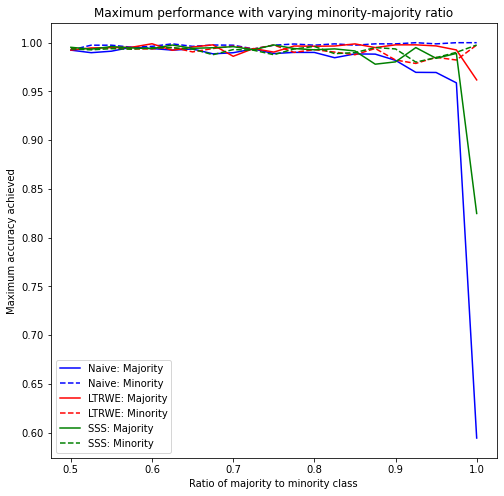

In [13]:
import numpy as np
from matplotlib import pyplot as plt

def get_performance_vs_ratio_trace(results_dict):
    x = np.array(ratios)
    y_maj = []
    y_min = []
    for ratio in ratios:
        results = results_dict[ratio]
        yy_maj = np.array(results['test_majority_acc']['values'])
        yy_min = np.array(results['test_minority_acc']['values'])
        max_accuracy_idx = np.argmax(yy_maj+yy_min)
        y_maj.append(yy_maj[max_accuracy_idx])
        y_min.append(yy_min[max_accuracy_idx])
    y_maj = np.array(y_maj)
    y_min = np.array(y_min)
    return x, y_maj, y_min

(fig, ax) = plt.subplots(1, 1, figsize=(8, 8))

x, y_maj, y_min = get_performance_vs_ratio_trace(naive_results)
ax.plot(x, y_maj, linestyle='-', color='blue', label='Naive: Majority')
ax.plot(x, y_min, linestyle='--', color='blue', label='Naive: Minority')

x, y_maj, y_min = get_performance_vs_ratio_trace(ltrwe_results)
ax.plot(x, y_maj, linestyle='-', color='red', label='LTRWE: Majority')
ax.plot(x, y_min, linestyle='--', color='red', label='LTRWE: Minority')

x, y_maj, y_min = get_performance_vs_ratio_trace(sss_results)
ax.plot(x, y_maj, linestyle='-', color='green', label='SSS: Majority')
ax.plot(x, y_min, linestyle='--', color='green', label='SSS: Minority')

ax.set_xlabel('Ratio of majority to minority class')
ax.set_ylabel('Maximum accuracy achieved')
ax.set_title('Maximum performance with varying minority-majority ratio')
ax.legend()